[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.4 Stündliche Primär-Energie und Treibhausgas-Emissionen

In [5]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [7]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
import FLUCCOplus.conversion_factors as conversion

In [8]:
em = elmap.fetch_common().rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=False)[elmap.SOURCES]
em


,biomass,hydro,solar,wind,geothermal,coal,gas,nuclear,oil,unknown,battery_discharge,hydro_discharge
datetime,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,458.978941,1395.092302,0.007834,470.125145,0.323146,1779.487592,822.339497,1140.124407,40.767615,482.022001,0.0,16.481521
2015-01-01 01:00:00+00:00,443.831453,1267.718904,0.017926,467.085219,0.319514,1689.546071,664.066702,1134.451966,40.438080,479.978696,0.0,17.295469
2015-01-01 02:00:00+00:00,433.990259,1194.695333,0.009358,474.533958,0.323014,1560.145476,614.026376,1077.533961,41.056407,421.923329,0.0,0.012529
2015-01-01 03:00:00+00:00,429.802029,1223.516679,0.000961,486.656888,0.329711,1485.545259,589.683849,1039.160298,41.277124,390.527200,0.0,0.000000
2015-01-01 04:00:00+00:00,434.734636,1219.485328,0.001146,502.425468,0.338643,1434.766908,592.131767,1077.552626,42.049861,453.763620,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,297.010418,2203.494088,0.000450,1467.690056,0.012752,529.465305,1724.610213,236.881850,3.476181,51.631556,NaN,521.977130
2019-12-31 20:00:00+00:00,313.281308,1930.057597,0.000558,1562.480117,0.026639,559.374103,1579.852098,268.588811,5.632769,52.347259,NaN,275.358741
2019-12-31 21:00:00+00:00,326.681690,1906.474431,0.000366,1661.476572,0.030509,598.331478,1508.148087,295.068386,6.304218,55.435488,NaN,169.798776


In [9]:
# map([print(i) for i in conversion.CONVERSION_FACTORS.keys()])

In [10]:
conversion.conversion_mapping

{'biomass': 'Heizkraftwerk Holz',
 'hydro': 'Wasserkraft',
 'solar': 'Fotovoltaik',
 'wind': 'Windkraft',
 'geothermal': 'Heizkraftwerk Geothermie',
 'coal': 'Braunkohlekraftwerk (Dampf)',
 'gas': 'Blockheizkraftwerk Gas',
 'nuclear': 'Atomkraftwerk',
 'oil': 'Kraftwerk Schweröl',
 'unknown': 'ENTSO-E-Mix',
 'battery_discharge': 'ENTSO-E-Mix',
 'hydro_discharge': 'Pumpspeicherung'}

In [11]:
conversion.conversion_columns


['Primärenergiefaktor total [MJ-eq]',
 'Primärenergiefaktor fossil [MJ-eq]',
 'Primärenergiefaktor nuklear  [MJ-eq]',
 'Primärenergiefaktor total erneuerbar [MJ-eq]',
 'Primärenergiefaktor Abwärme / Abfall [MJ-eq]',
 'CO2-Äquivalente  [kg CO2-eq]']

C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


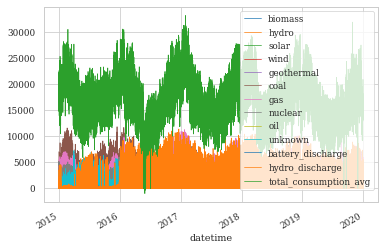

In [12]:
em = elmap.fetch_common();
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=True);

PE = elmap.primary_energy(em[elmap.SOURCES])

PE.plot();

In [ ]:

faktoren = conversion.CONVERSION_FACTORS


In [14]:
header = conversion.conversion_columns
PE_teile = header[1:4]

In [15]:
f = pd.DataFrame(faktoren).transpose()
f

,Primärenergiefaktor total [MJ-eq],Primärenergiefaktor fossil [MJ-eq],Primärenergiefaktor nuklear [MJ-eq],Primärenergiefaktor total erneuerbar [MJ-eq],Primärenergiefaktor Abwärme / Abfall [MJ-eq],CO2-Äquivalente [kg CO2-eq],"Kohlendioxid, fossil [kg CO2-eq]",Umweltbelastungspunkte [UBP'13]
Atomkraftwerk,4.21,0.06,4.14,0.01,0.00,0.006,0.005,125.8
Erdgaskombikraftwerk GuD,2.22,2.21,0.01,0.01,0.00,0.129,0.121,85.6
Braunkohlekraftwerk (Dampf),3.95,3.90,0.03,0.01,0.00,0.377,0.370,220.2
Steinkohlekraftwerk (Dampf),3.94,3.87,0.04,0.03,0.00,0.344,0.298,213.4
Kraftwerk Schweröl,3.83,3.78,0.04,0.01,0.00,0.281,0.268,302.5
Kehrichtverbrennung,0.02,0.01,0.00,0.00,1.11,0.002,0.001,8.9
Heizkraftwerk Holz,3.88,0.19,0.05,3.64,0.00,0.033,0.012,81.9
Blockheizkraftwerk Diesel,3.28,3.23,0.04,0.01,0.00,0.229,0.215,187.9
Blockheizkraftwerk Gas,2.94,2.92,0.01,0.01,0.00,0.186,0.159,122.3
Blockheizkraftwerk Biogas,0.91,0.50,0.32,0.09,1.11,0.112,0.032,103.8


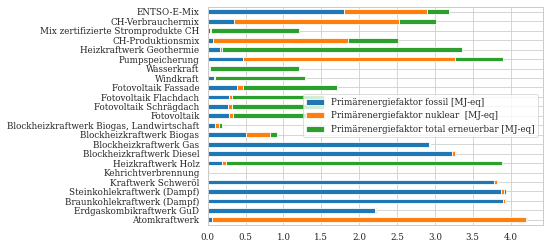

In [16]:
f[PE_teile].plot(kind="barh", stacked=True);


C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


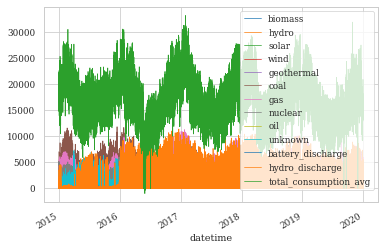

In [17]:
em = elmap.fetch_common();
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=True);

PE = elmap.primary_energy(em[elmap.SOURCES])

PE.plot();

In [18]:
hourly_PEfactor = PE["total_consumption_avg"] / em["total_consumption_avg"]

In [19]:
avg_factors = hourly_PEfactor.resample("Y").mean()

<AxesSubplot:ylabel='datetime'>

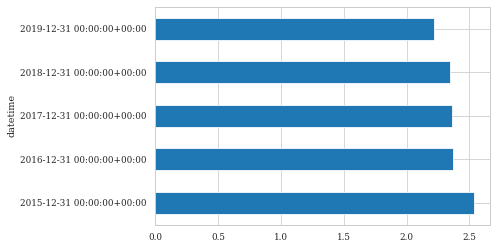

In [20]:
avg_factors.plot(kind="barh")

<AxesSubplot:ylabel='datetime'>

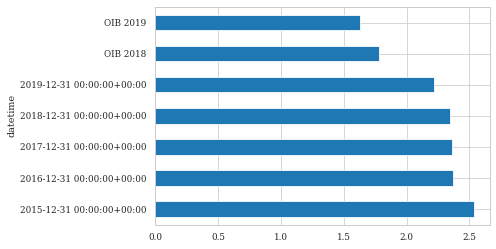

In [21]:
avg_factors["OIB 2018"] = 1.78
avg_factors["OIB 2019"] = 1.63
avg_factors.plot(kind="barh")

In [38]:
fPEs = elmap.pe_factors().drop(columns=["fPE"])

C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


In [39]:
fPEs.columns

Index(['fPE,n.ern.', 'fPE,ern.', 'fPE,nukl.', 'fPE,abw.'], dtype='object')

In [40]:
fPEs.mean()

fPE,n.ern.    1.004416
fPE,ern.      0.881733
fPE,nukl.     0.479614
fPE,abw.      0.000000
dtype: float64

<AxesSubplot:ylabel='datetime'>

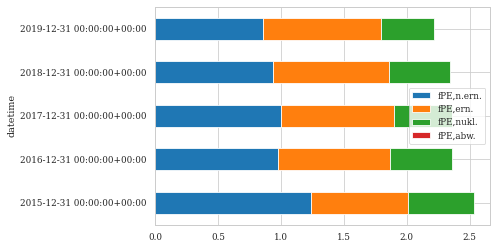

In [41]:
fPEs.resample("Y").mean().plot(kind="barh", stacked="true")

In [28]:
avg_factors = hourly_PEfactor.resample("Y").mean()

<AxesSubplot:ylabel='datetime'>

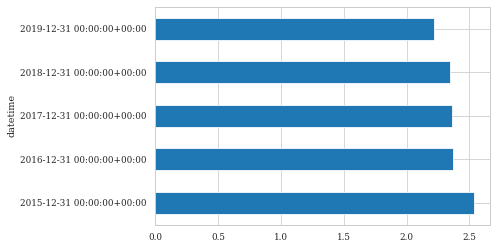

In [29]:
avg_factors.plot(kind="barh")

<AxesSubplot:ylabel='datetime'>

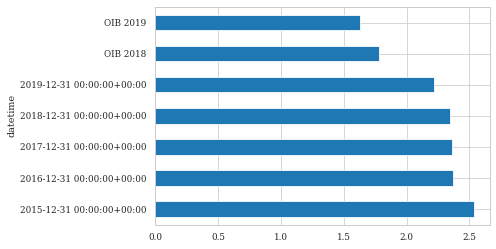

In [30]:
avg_factors["OIB 2018"] = 1.78
avg_factors["OIB 2019"] = 1.63
avg_factors.plot(kind="barh")

In [25]:
fPEs.to_csv(DATA_INTERIM / "fPEs_15-19.csv",
          sep=";",
          decimal=",",
          encoding="cp850")

<AxesSubplot:xlabel='datetime'>

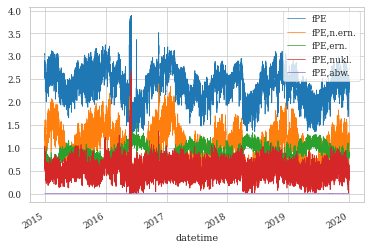

In [26]:
a = elmap.read_interim("fPEs_15-19.csv")
a.plot()